In [149]:
from random import shuffle
import glob
import tensorflow as tf
from sklearn.externals import joblib
import numpy as np
from sklearn import preprocessing
import uuid
from tensorflow.keras.preprocessing.image import random_shift, random_zoom, random_rotation
import sys
from os import listdir
from os.path import isfile, join
import os
import matplotlib.pyplot as plt
import cv2
import keras

from keras.callbacks import Callback
from keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras import backend as K
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten, Dropout
from tensorflow.keras.preprocessing.image import random_shift, random_zoom, random_rotation

import keras

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K

In [3]:
#shuffle the addresses before saving
img_parts = r'D:\imageRecognition\fecredit\image parts\*.jpg'

In [4]:
cat_dog_train_path = r'C:\Users\odkon\fecredit\augmented\*.jpg'

In [5]:
augmented_path = r'C:\Users\odkon\fecredit\augmented'

In [289]:
dir_parts = r'D:\imageRecognition\fecredit\image parts'
onlyfiles = [f for f in listdir(dir_parts) if isfile(join(dir_parts, f))]

In [7]:
def train_preprocess(image):   

    new = random_zoom(
        image,
        (np.random.uniform(low=0.6, high=1.5), np.random.uniform(low=0.6, high=1.5)),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    new = random_rotation(
        new,
        50,
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    new=random_shift(
        new,
        0.45,
        0.45,
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    # Other transformations...
    return new

In [146]:
file_name=onlyfiles[0]

image = cv2.imread(os.path.join(dir_parts,file_name))

In [150]:
image.shape

(31, 25, 3)

In [686]:
for file_name in onlyfiles:

    image = cv2.imread(os.path.join(dir_parts,file_name))
    
    print(file_name)

    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #image = cv2.resize(image, (40, 40))

    plt.imsave(os.path.join(augmented_path, file_name), image , cmap = plt.cm.gray)

    image = image.reshape([image.shape[0], image.shape[1],1])

    for i in np.arange(250):
        new = train_preprocess(image)
        new = new.reshape([new.shape[0], new.shape[1]])
        plt.imsave(os.path.join(augmented_path,'{}_{}.jpg'.format(file_name[:3],uuid.uuid4())), new , cmap = plt.cm.gray)

t_0_062f54cd-f91b-4a07-a883-2d46c9328aef.jpg
t_0_095b4375-f299-487c-8359-4f266bdbfd91.jpg
t_0_1dacca38-d7f8-407d-89cd-47dc32375ac2.jpg
t_0_224115a9-18bf-4f9f-95db-7d7aa8b9ffa6.jpg
t_0_2bb3b26d-556e-475b-b793-3820452000f3.jpg
t_0_36bc6451-5fad-46e7-b27d-2007d681b742.jpg
t_0_37807279-b346-47df-ae9b-93cc37e9496d.jpg
t_0_3c8bb706-6795-4ea0-bdad-2fea64855b41.jpg
t_0_3fb914e6-80c4-4ee5-848e-f93984f34397.jpg
t_0_435e492b-af3d-4e29-96cf-a7b7f13e271e.jpg
t_0_44494495-414c-40ab-b50e-48d408cc8758.jpg
t_0_54f3fdf4-a93a-491b-8e04-19ae02fcd178.jpg
t_0_5f616bd0-a44a-4254-bb43-368547770607.jpg
t_0_61dad696-5027-4130-9d75-a984b2c7ac3a.jpg
t_0_7394d940-b7ea-4071-abd0-e1d1876b90f8.jpg
t_0_803747ba-6dfa-4a56-be75-059dc37eaf82.jpg
t_0_881268bd-fd90-4c3c-b35f-a32f3fa00391.jpg
t_0_8d499749-9b67-4158-9123-762a8bdd98d8.jpg
t_0_a9e6ea5c-c493-4b8d-a3b1-924cc44aa3b9.jpg
t_0_ae1a4682-16f5-484c-95aa-345de511568f.jpg
t_0_b0565a37-27ec-43f1-96f4-e6b0dcea4bda.jpg
t_0_b142632b-069e-49f6-aac7-cfb41a1717ce.jpg
t_0_b5875a

t_4_b5dcbd30-4434-4e46-a2cf-673720b5cc41.jpg
t_4_bbf4cf79-97b0-42ac-97cb-2415198de3df.jpg
t_4_bc13c681-44ac-4026-ad31-234954cd7b5a.jpg
t_4_c136e8de-dcd8-4f6f-9504-6d208a689f45.jpg
t_4_d226bc0a-8028-4db5-9d1a-71bc31e5b457.jpg
t_4_d3fceeee-df15-4fd6-b8e8-6ffd68a9f715.jpg
t_4_d64911af-aecd-47b7-b240-4303a108e897.jpg
t_4_e09b2100-455b-4947-97a1-9209d5b39001.jpg
t_4_e1fbd0e0-55b2-4824-a2ff-a4dbf6dc1031.jpg
t_4_e68f5b6f-dd2d-43a2-9995-9fb897c76973.jpg
t_4_ed4da539-173b-47ae-ab5b-2e6e6d47309a.jpg
t_4_eebeb7a6-52d0-4872-bfec-7e5359db1cf6.jpg
t_4_f0a12760-78c2-4fbe-a722-b2371efa16ef.jpg
t_4_f81cc14b-f4b2-4edd-be81-d74bd585f802.jpg
t_4_f9a186af-83ac-4578-8433-3145717ed4f2.jpg
t_5_0a39803b-8aec-4295-881f-e7dc3ba3c006.jpg
t_5_0d7f0f72-8b50-48cc-a098-6c01d5c2b7c7.jpg
t_5_0e8452fc-1006-4b69-ba43-6ae54598ea54.jpg
t_5_0ff03f4c-d4e5-4110-ba49-b62b5593c58d.jpg
t_5_11122aeb-902e-419f-8b4e-92ed6d040646.jpg
t_5_1394b1f8-57fc-4aa7-8312-32e5860972c7.jpg
t_5_1802e240-3419-4d5f-beb0-a3b56f56e9aa.jpg
t_5_2813f3

t_9_214c5701-a44c-40f2-b21e-189fb17ab4a1.jpg
t_9_2395c913-e785-4d02-997d-88f7d2743abc.jpg
t_9_25e216a7-a40a-4f6d-871d-09c2e942904b.jpg
t_9_2783d4b9-2541-4d24-be15-e68cbcc4a27b.jpg
t_9_27c2faaf-aa96-473a-93b0-f34cd41b849e.jpg
t_9_2ad4ca67-2416-4346-8ce5-19e2e62facf7.jpg
t_9_323c638e-c985-4a02-83e6-6824efceff55.jpg
t_9_362f0f75-c170-4b9e-afd8-a78b874d6986.jpg
t_9_371ce5e8-90fc-473c-84c2-ecebbe9c0ab4.jpg
t_9_3fab492d-1307-4079-a2d0-7bb35d7575aa.jpg
t_9_41e025d7-447d-4eef-a6a4-e970a0a45d43.jpg
t_9_430d282d-62ee-44ff-962a-773eecf2a034.jpg
t_9_441425f3-b51c-48b3-bd9d-3266737a4be2.jpg
t_9_4bd653a3-baa1-4d85-8e3a-6367ec565488.jpg
t_9_53442172-6d77-4a78-a74d-154433729617.jpg
t_9_537b20b8-a085-492b-bf5d-d2160a53a8ce.jpg
t_9_66c2bab7-c671-45e3-8cf7-6d91c26a6467.jpg
t_9_67228a09-6420-4306-b4d7-63d41c7cfd0e.jpg
t_9_750a961e-4e23-4916-b1e7-ec8189ef3607.jpg
t_9_7d6ee00e-c304-40ae-8cc8-5b9bd4d8c70b.jpg
t_9_8c9753a6-c1ec-49ba-8273-8910c5745790.jpg
t_9_8e2ec1a2-9c77-4e7d-9fa3-b3916c4dbfcf.jpg
t_9_8e5bd3

t_D_6183bb14-1382-4496-8cff-ba4d6b389c5c.jpg
t_D_62ead05a-43c4-427b-9709-cfce1e7a5c0e.jpg
t_D_63554364-e7cd-47a5-b87a-05ea1a34355b.jpg
t_D_6a6797b0-10cd-4fc5-b9b4-77b6290c8e24.jpg
t_D_6ccabad1-3b17-42e2-b757-b296c5416c7d.jpg
t_D_6ce01be1-2889-45ea-9dc0-a327a84013bf.jpg
t_D_6f4b86af-01c7-44f4-ab8a-34631c2094bb.jpg
t_D_70f18401-9b44-4174-9072-1468b4732481.jpg
t_D_7588e138-b04e-4004-9c28-0eed82e49fb2.jpg
t_D_780c6202-27e7-46ef-a640-8bcf705372eb.jpg
t_D_9714ad5e-4ec2-4052-b9a3-fe1b632d143e.jpg
t_D_97a40774-1ff8-4b09-aa79-26e54bc952e1.jpg
t_D_9b24f018-f95a-4aa7-9f80-906dd943a288.jpg
t_D_ab75dee6-35ec-4446-9bc4-3db1c95c02aa.jpg
t_D_b30764d7-0f98-46aa-a19f-7218f876b969.jpg
t_D_ba29e0d2-053f-473a-8508-d2103d7c6379.jpg
t_D_cb4aa9f1-54e8-42b1-b941-88e0033d062c.jpg
t_D_d25ab112-3e15-4b97-986d-b52a0730659e.jpg
t_D_e67f71fe-f7f2-4ed1-8359-804c162d6886.jpg
t_D_ec68216b-fe18-437f-941c-ffb69055868b.jpg
t_D_f2dec5b3-ce73-4248-8368-6d339e565d38.jpg
t_D_f579e220-5ef7-40ee-b121-adc2d9aed21e.jpg
t_D_f69662

t_H_8fa465f7-9ec8-40db-b47f-08558e08593d.jpg
t_H_90613996-3665-4af4-94a4-f11ab4822a5c.jpg
t_H_990d0ff8-e464-4bd5-8589-839a56454399.jpg
t_H_9e0ed5b4-527d-4450-8434-abc4f01a3bdd.jpg
t_H_9e3835b7-9de6-4f50-bb53-2360f163a063.jpg
t_H_a01a60a4-8587-4639-a344-06948f3a0193.jpg
t_H_b412a3e0-866d-4d56-9f60-4d82efc0f27f.jpg
t_H_b5e81faa-ed20-4ed9-9bea-90dc019532ee.jpg
t_H_bd484475-8d13-48d7-aa8f-388bd644704b.jpg
t_H_c4ec7746-8022-4ca4-8779-894a68c2f76d.jpg
t_H_d2ee25e3-6148-474c-845f-35f611ca96d9.jpg
t_H_d9583051-d3c1-41a4-a875-271ae0072274.jpg
t_H_dcd4a66a-46e5-4ee2-89c9-221eb552c58b.jpg
t_H_f9dc42c3-19b6-44e3-a581-242dc3a4c77d.jpg
t_I_0cfafe4f-41a5-4c61-8445-28328889de40.jpg
t_I_0d6c67c3-ff90-4e16-9c4b-ee3ee10bd7ad.jpg
t_I_0e96ca62-0376-48b5-9594-53a4616fcedb.jpg
t_I_135f280e-f65e-4dec-8766-304951f1d190.jpg
t_I_16c84a17-5155-4264-be74-fcdede09dce1.jpg
t_I_17821f9d-16f0-46aa-acf3-1b431dd6cfb0.jpg
t_I_185681b6-1828-43cf-9db2-3457db389edd.jpg
t_I_1a2dd15a-48b0-4d40-b08a-65596d090dd4.jpg
t_I_25fb27

t_M_293706a3-0448-4206-8024-91fdb2c56f9b.jpg
t_M_2ebbcf65-7dde-4b5f-8e90-9b64fdf88695.jpg
t_M_33e60171-bab8-495d-97fe-bb301a08a0ad.jpg
t_M_3867a797-cb72-4d36-8890-12143c20a563.jpg
t_M_40767648-6f08-4af0-b80c-105ee34d903c.jpg
t_M_4c9fe12f-3d95-49e0-aa29-1044dcb31282.jpg
t_M_4df80e88-80cc-4c0d-899e-c5e66eed0e67.jpg
t_M_4f8bf00d-b3bf-432f-90f1-e0955e379dbd.jpg
t_M_50f09015-3ece-4d5f-a80e-a01504300a2e.jpg
t_M_68e8eb2b-f05a-4a25-a43b-820553d8b6dc.jpg
t_M_6d5235cf-7ce4-4930-b02d-a8ab82b3a5c0.jpg
t_M_75537a51-6da7-41d2-8d10-c2a43e78f2f9.jpg
t_M_761f441a-a7dd-44cb-8051-877e05f941de.jpg
t_M_7a264bdf-429f-47ac-acca-a75452ca3a80.jpg
t_M_7a7779ae-f78b-4660-aa1e-c04d84512639.jpg
t_M_8cb08050-9824-4dd3-9797-9121d53358e2.jpg
t_M_8d35a271-5031-404d-84a1-10e8736b9924.jpg
t_M_8e9fefb7-be63-4cd7-a48c-970f7de93938.jpg
t_M_920b6ea8-a963-4d79-8560-672f45c20e01.jpg
t_M_94f3c107-e60b-4398-bd6d-ca5a648eb8f1.jpg
t_M_96d406b8-faeb-4871-a9fb-195269c4e806.jpg
t_M_97754553-679b-4d68-9dcd-726d915079ed.jpg
t_M_a6649a

t_Q_0be7e14c-ade5-4ed2-b0bd-9bc705c5bde5.jpg
t_Q_0ee78c39-c1d4-4b5c-a3ad-def9c813c65c.jpg
t_Q_27522bc3-85af-4940-bfee-bbb5abc764a6.jpg
t_Q_2abde79a-b844-4c71-967a-c8479052840f.jpg
t_Q_2cf211dd-d503-4174-8c31-0915f971c7e1.jpg
t_Q_2ee5c139-a69e-46e6-b910-065e633c16a8.jpg
t_Q_30f7e54e-fce9-487f-a3b7-09c56dc239f9.jpg
t_Q_34702486-b065-4b12-93d5-ddf445968329.jpg
t_Q_34b03f74-07bb-4a75-81d4-c96e93efbc8f.jpg
t_Q_35a717c1-f5bb-4198-a27e-827dac39ea28.jpg
t_Q_37c6466e-6484-42d9-b689-d10de1226d21.jpg
t_Q_4079d092-6e44-46ab-aa8f-0fe89e8c4449.jpg
t_Q_49c42e4a-1694-4fc7-b6ad-248ab743a454.jpg
t_Q_52dcc681-290e-4590-add2-5f24aecdc0ee.jpg
t_Q_628fe1b2-1257-4837-8014-e2792e14bc7a.jpg
t_Q_639445ee-f363-4c33-9e6d-83220712e0e7.jpg
t_Q_63beedff-184e-47c1-9290-0df9eae9b03a.jpg
t_Q_6648e509-72ca-44e9-9197-f0ddded82921.jpg
t_Q_6cb15460-b9f7-44e1-8375-3bce4c07b6cf.jpg
t_Q_7dd0c030-f5fb-4642-8725-f193f3dbd460.jpg
t_Q_82d117af-640c-468d-96ac-1ee9771fc80e.jpg
t_Q_830d91f6-9d1f-446f-8da8-8a5c30f168ec.jpg
t_Q_8f8537

t_U_d52e9e64-0cfa-4238-9c94-7fce17a5b3db.jpg
t_U_d57aad45-0048-4ab1-8f0f-96f8fcf3e94e.jpg
t_U_dcac74b8-cc02-49a1-9b7b-44f3db03479d.jpg
t_U_e1d701f4-e749-4532-b386-a36a226e6270.jpg
t_U_e4035a3c-be28-43ad-ad72-d523efa2f76b.jpg
t_U_f2e8f325-bccc-4ca7-8d5d-7aa174bc19a1.jpg
t_U_f7241fce-5602-4a8d-9e90-3a55577917c6.jpg
t_U_f84ea153-2037-4360-a2f5-389ab0c6bcfb.jpg
t_U_f9860d4c-983d-4112-b083-dc40a1f82b03.jpg
t_V_040f53c4-bc14-47f2-ada6-e6469180864d.jpg
t_V_0579e28e-2eb3-4c9b-911c-b28bab1c6077.jpg
t_V_06ec7c4a-229b-42fe-aa10-f69dac523f67.jpg
t_V_072d21c5-cdd0-4530-bfba-7daa0736d279.jpg
t_V_0ea26337-a142-4b09-be63-02349d24d33b.jpg
t_V_15331595-d073-4c05-a34d-834731976f5f.jpg
t_V_1e77d95c-1ae5-4642-9b4a-36793c76eaaf.jpg
t_V_26a2893b-5158-406f-9faa-f5f1f0c053ce.jpg
t_V_2a6aa735-4b8a-461b-94f7-aca3bb2d0c00.jpg
t_V_32abce7a-60c0-4a3f-bf28-3df2aa3125e7.jpg
t_V_3adbb7ab-c45b-470a-8f79-9fe87ac3ae4f.jpg
t_V_44507ced-dc2f-41db-94bf-5bf4283568a7.jpg
t_V_4c6d3863-edfb-4843-89d9-c9fcbf06c581.jpg
t_V_53551e

In [2]:
addrs = glob.glob(dir_parts)

NameError: name 'glob' is not defined

In [9]:
labels_basic = [addr.split("\\")[-1][2:3] for addr in addrs]

In [10]:
le = preprocessing.LabelEncoder()

In [11]:
le.fit(labels_basic)

LabelEncoder()

In [12]:
_ = joblib.dump(le, r'D:\imageRecognition\labelencoder.joblib', compress=9)

In [142]:
le = joblib.load(r'D:\imageRecognition\labelencoder.joblib')

In [174]:
le.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], dtype='<U1')

In [151]:
img = load_image(train_addrs[0])

In [152]:
img.shape

(40, 40)

In [13]:
labels = le.transform(labels_basic) 

In [14]:
# read addresses and labels from the 'train' folder
  # 0 = Cat, 1 = Dog
# to shuffle data
if shuffle_data:
    c = list(zip(addrs, labels))
    shuffle(c)
    addrs, labels = zip(*c)
    
# Divide the hata into 60% train, 20% validation, and 20% test
train_addrs = addrs[0:int(0.8*len(addrs))]
train_labels = labels[0:int(0.8*len(labels))]
test_addrs = addrs[int(0.8*len(addrs)):]
test_labels = labels[int(0.8*len(labels)):]

In [3]:
len(train_addrs)

NameError: name 'train_labels' is not defined

In [176]:
from absl import app as absl_app 

In [14]:
w,h=40,40

In [153]:
def load_image(addr):
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    img = cv2.imread(addr)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (w, h), interpolation=cv2.INTER_CUBIC)
    img = img.astype(np.float32)
    return img

In [119]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [120]:
train_filename = r'C:\Users\odkon\fecredit\tfrecords\train_1.tfrecords' # address to save the TFRecords file
# open the TFRecords file
writer = tf.python_io.TFRecordWriter(train_filename)

j=1
for i in range(len(train_addrs)):
    # print how many images are saved every 1000 images
    if not i % 100000:
        print('Train data: {}/{}'.format(i, len(train_addrs)))
        writer.close()
        train_filename = r'C:\Users\odkon\fecredit\tfrecords\train_{}.tfrecords'.format(j)  # address to save the TFRecords file
        # open the TFRecords file
        writer = tf.python_io.TFRecordWriter(train_filename)
        j=j+1
        sys.stdout.flush()
    # Load the image
    
    if not i % 10000:
        print(i)
    img = load_image(train_addrs[i])
    label = train_labels[i]
    # Create a feature
    feature = {'label': _int64_feature(label),
               'image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Train data: 0/289754
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
Train data: 100000/289754
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
Train data: 200000/289754
200000
210000
220000
230000
240000
250000
260000
270000
280000


In [121]:
train_filename = r'C:\Users\odkon\fecredit\tfrecords\test_1.tfrecords' # address to save the TFRecords file
# open the TFRecords file
writer = tf.python_io.TFRecordWriter(train_filename)

j=1
for i in range(len(test_addrs)):
    # print how many images are saved every 1000 images
    if not i % 100000:
        print('Train data: {}/{}'.format(i, len(test_addrs)))
        writer.close()
        train_filename = r'C:\Users\odkon\fecredit\tfrecords\test_{}.tfrecords'.format(j)  # address to save the TFRecords file
        # open the TFRecords file
        writer = tf.python_io.TFRecordWriter(train_filename)
        j=j+1
        sys.stdout.flush()
    # Load the image
    
    if not i % 10000:
        print(i)
    img = load_image(test_addrs[i])
    label = test_labels[i]
    # Create a feature
    feature = {'label': _int64_feature(label),
               'image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Train data: 0/72439
0
10000
20000
30000
40000
50000
60000
70000


In [2]:
def _parse_function(proto):
    # define your tfrecord again. Remember that you saved your image as a string.
    keys_to_features = {'image': tf.FixedLenFeature([], tf.string),
                        'label': tf.FixedLenFeature([], tf.int64)}
    
    # Load one example
    parsed_features = tf.parse_single_example(proto, keys_to_features)
    
    # Turn your saved image string into an array
    parsed_features['image'] = tf.decode_raw(parsed_features['image'], tf.float32)
    
    parsed_features['image'] = tf.reshape(parsed_features['image'], [-1, h, w, 1])
    parsed_features['label'] = tf.cast(parsed_features['label'],  tf.int64)
    
    return parsed_features['image'], parsed_features['label']

In [3]:
class EvaluateInputTensor(Callback):
    """ Validate a model which does not expect external numpy data during training.

    Keras does not expect external numpy data at training time, and thus cannot
    accept numpy arrays for validation when all of a Keras Model's
    `Input(input_tensor)` layers are provided an  `input_tensor` parameter,
    and the call to `Model.compile(target_tensors)` defines all `target_tensors`.
    Instead, create a second model for validation which is also configured
    with input tensors and add it to the `EvaluateInputTensor` callback
    to perform validation.

    It is recommended that this callback be the first in the list of callbacks
    because it defines the validation variables required by many other callbacks,
    and Callbacks are made in order.

    # Arguments
        model: Keras model on which to call model.evaluate().
        steps: Integer or `None`.
            Total number of steps (batches of samples)
            before declaring the evaluation round finished.
            Ignored with the default value of `None`.
    """

    def __init__(self, model, steps, metrics_prefix='val', verbose=1):
        # parameter of callbacks passed during initialization
        # pass evalation mode directly
        super(EvaluateInputTensor, self).__init__()
        self.val_model = model
        self.num_steps = steps
        self.verbose = verbose
        self.metrics_prefix = metrics_prefix

    def on_epoch_end(self, epoch, logs={}):
        self.val_model.set_weights(self.model.get_weights())
        results = self.val_model.evaluate(None, None, steps=int(self.num_steps),
                                          verbose=self.verbose)
        metrics_str = '\n'
        for result, name in zip(results, self.val_model.metrics_names):
            metric_name = self.metrics_prefix + '_' + name
            logs[metric_name] = result
            if self.verbose > 0:
                metrics_str = metrics_str + metric_name + ': ' + str(result) + ' '

        if self.verbose > 0:
            print(metrics_str)

In [6]:
def cnn_layers(x_train_input):
    x = layers.Conv2D(32, (3, 3),
                      activation='relu', padding='valid')(x_train_input)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x_train_out = layers.Dense(NUM_CLASSES,
                               activation='softmax',
                               name='x_train_out')(x)
    return x_train_out

In [7]:
epochs = 15
capacity = 10000
min_after_dequeue = 3000
enqueue_many = True
NUM_CLASSES = 35
SUM_OF_ALL_DATASAMPLES=100000
BATCHSIZE=128
STEPS_PER_EPOCH= SUM_OF_ALL_DATASAMPLES / BATCHSIZE
w, h = 40,40


In [20]:
with tf.device('/gpu:0'):
    K.clear_session()
    config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 5} ) 
    sess = tf.Session(config=config) 
    K.set_session(sess)
    #Get your datatensors
    filepath=[r'D:\tfrecords\train_1.tfrecords',r'D:\tfrecords\train_2.tfrecords',r'D:\tfrecords\train_3.tfrecords']
    image, label = create_dataset(filepath)

    model_input = layers.Input(tensor=image)
    model_output = cnn_layers(model_input)
    train_model = keras.models.Model(inputs=model_input, outputs=model_output)

    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    #Compile your model
    train_model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'],
                       target_tensors=[label])


    filepath_test=[r'D:\tfrecords\test_1.tfrecords']
    #Get your datatensors
    image_test, label_test = create_dataset(filepath_test)

    model_input_test = layers.Input(tensor=image_test)
    model_output_test = cnn_layers(model_input_test)
    test_model = keras.models.Model(inputs=model_input_test, outputs=model_output_test)

    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    test_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'],
                        target_tensors=[label_test])


   #Train the model
    train_model.fit(epochs=epochs,
                    steps_per_epoch=100, callbacks=[EvaluateInputTensor(test_model, steps=100),
                                                   TensorBoard(
                            log_dir=os.path.join(r'D:\tfrecords\logs','tb_'.format(0))
                                                        , histogram_freq=0
                                                        , batch_size=32, write_graph=False
                                                        , write_grads=False, write_images=False
                                                       , embeddings_freq=0, embeddings_layer_names=None
                                                        , embeddings_metadata=None, embeddings_data=None)
                                                   
                                                   
                                                   ])

    train_model.save_weights(r'D:\tfrecords\weights\saved_wt.h5')



Epoch 1/15
100/100 [==============================] - 5s 49ms/step

val_loss: 15.676112518310546 val_acc: 0.027421875 
Epoch 2/15
100/100 [==============================] - 4s 44ms/step

val_loss: 15.401607570648194 val_acc: 0.02984375 
Epoch 3/15
100/100 [==============================] - 4s 43ms/step

val_loss: 15.62841209411621 val_acc: 0.03 
Epoch 4/15
100/100 [==============================] - 4s 44ms/step

val_loss: 15.610632734298706 val_acc: 0.031484375 
Epoch 5/15
100/100 [==============================] - 4s 43ms/step

val_loss: 15.174227256774902 val_acc: 0.026875 
Epoch 6/15
100/100 [==============================] - 4s 43ms/step

val_loss: 3.5658480095863343 val_acc: 0.034765625 
Epoch 7/15
100/100 [==============================] - 4s 43ms/step

val_loss: 3.5398582124710085 val_acc: 0.041640625 
Epoch 8/15
 91/100 [==========================>...] - ETA: 1s - loss: 3.5405 - acc: 0.0424

KeyboardInterrupt: 

In [4]:
epochs = 45
capacity = 10000
min_after_dequeue = 3000
enqueue_many = True
NUM_CLASSES = 35
SUM_OF_ALL_DATASAMPLES=100000
BATCHSIZE=128
STEPS_PER_EPOCH= 150
w, h = 40,40


In [15]:
with tf.device('/gpu:0'):
    K.clear_session()
    config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 5} ) 
    sess = tf.Session(config=config) 
    K.set_session(sess)
    #Get your datatensors
    def create_dataset(filepath,BATCH_SIZE=128,SHUFFLE_BUFFER=50000):
    
        # This works with arrays as well
        dataset = tf.data.TFRecordDataset(filepath)

        # Maps the parser on every filepath in the array. You can set the number of parallel loaders here
        dataset = dataset.map(_parse_function, num_parallel_calls=4)

        # This dataset will go on forever
        dataset = dataset.repeat().shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)


        # Create an iterator
        iterator = dataset.make_one_shot_iterator()

        # Create your tf representation of the iterator
        image, label = iterator.get_next()

        # Bring your picture back in shape

        image = tf.reshape(image, [-1, 40, 40, 1])

        # Create a one hot array for your labels
        label = tf.one_hot(label, NUM_CLASSES)

        return image, label
    
    def lr_schedule(epoch):

        lr = 1e-3
        if epoch > 30:
            lr *= 0.5e-3
        elif epoch > 22:
            lr *= 1e-3
        elif epoch > 15:
            lr *= 1e-2
        elif epoch > 8:
            lr *= 1e-1
        print('Learning rate: ', lr)
        return lr

    lr_scheduler = LearningRateScheduler(lr_schedule)

    lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                   cooldown=0,
                                   patience=5,
                                   min_lr=0.5e-6)

    filepath=[r'D:\tfrecords\train_1.tfrecords',r'D:\tfrecords\train_2.tfrecords',r'D:\tfrecords\train_3.tfrecords']
    image, label = create_dataset(filepath)

 
    train_model = resnet_v1(image, 20, num_classes=NUM_CLASSES)


    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    #Compile your model
    train_model.compile(optimizer=Adam(lr=lr_schedule(0)),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'],
                       target_tensors=[label])


    filepath_test=[r'D:\tfrecords\test_1.tfrecords']
    #Get your datatensors
    image_test, label_test = create_dataset(filepath_test)

        

    test_model = resnet_v1(image_test,20, num_classes=NUM_CLASSES)

    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    test_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'],
                        target_tensors=[label_test])


   #Train the model
    train_model.fit(epochs=epochs,
                    steps_per_epoch=STEPS_PER_EPOCH, callbacks=[EvaluateInputTensor(test_model, steps=150),
                                                   TensorBoard(
                            log_dir=os.path.join(r'D:\tfrecords\logs','tb_'.format(0))
                                                        , histogram_freq=0
                                                        , batch_size=32, write_graph=False
                                                        , write_grads=False, write_images=False
                                                       , embeddings_freq=0, embeddings_layer_names=None
                                                        , embeddings_metadata=None, embeddings_data=None),
                                                    lr_scheduler
                                                    ,lr_reducer
                                                   ])

    train_model.save_weights(r'D:\tfrecords\weights\saved_wt.h5')



Learning rate:  0.001
Epoch 1/45
Learning rate:  0.001
150/150 [==============================] - 6s 43ms/step

val_loss: 4.141778674125671 val_acc: 0.13614583333333333 
Epoch 2/45
Learning rate:  0.001
150/150 [==============================] - 5s 35ms/step

val_loss: 1.7736513257026671 val_acc: 0.5023958333333334 
Epoch 3/45
Learning rate:  0.001
150/150 [==============================] - 5s 35ms/step

val_loss: 1.2748169175783792 val_acc: 0.6430729166666667 
Epoch 4/45
Learning rate:  0.001
150/150 [==============================] - 5s 36ms/step

val_loss: 1.4388701979319254 val_acc: 0.5871354166666667 
Epoch 5/45
Learning rate:  0.001
150/150 [==============================] - 5s 36ms/step

val_loss: 0.8479894387722016 val_acc: 0.77890625 
Epoch 6/45
Learning rate:  0.001
150/150 [==============================] - 5s 36ms/step

val_loss: 1.095352976322174 val_acc: 0.7052083333333333 
Epoch 7/45
Learning rate:  0.001
150/150 [==============================] - 5s 35ms/step

val_loss:

KeyboardInterrupt: 

In [16]:
train_model.save_weights(r'D:\tfrecords\weights\saved_wt.h5')

In [64]:
import base64

In [2]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(image,depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(tensor=image)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = keras.models.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
###### LOADING

In [143]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=(40,40,1))
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = keras.models.Model(inputs=inputs, outputs=outputs)
    return model

In [145]:
train_model = resnet_v1(20, num_classes=35)

Instructions for updating:
Colocations handled automatically by placer.


In [146]:
train_model.load_weights(r'D:\imageRecognition\fecredit\saved_wt.h5')

In [147]:
train_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [148]:
train_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 40, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 40, 40, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 40, 40, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 40, 40, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [151]:
file_name=onlyfiles[1300]

In [154]:
img = load_image(os.path.join(dir_parts,file_name))

In [155]:
img

array([[254., 254., 253., ..., 230., 225., 223.],
       [253., 252., 252., ..., 228., 224., 224.],
       [253., 252., 253., ..., 228., 225., 226.],
       ...,
       [255., 255., 255., ..., 193., 202., 209.],
       [255., 255., 255., ..., 192., 200., 207.],
       [255., 255., 255., ..., 192., 200., 207.]], dtype=float32)

In [156]:
res = train_model.predict(np.array([img.reshape(40,40,1),img.reshape(40,40,1),img.reshape(40,40,1) ]))

In [157]:
res

array([[4.0165617e-09, 4.5777860e-08, 1.9025176e-06, 1.7543153e-08,
        1.2374440e-10, 7.7478717e-09, 5.6428657e-09, 1.0568726e-06,
        2.9984512e-10, 3.8362278e-09, 5.4472551e-09, 1.1076520e-10,
        3.6036948e-08, 1.3037076e-06, 2.0905810e-08, 3.9916315e-10,
        4.4263597e-08, 6.8703763e-09, 5.0920901e-10, 1.6240080e-07,
        6.2820313e-06, 3.5955486e-06, 1.2797132e-07, 2.1796442e-04,
        5.6026405e-08, 9.8956912e-11, 4.3009408e-08, 4.4327150e-11,
        6.8023378e-09, 1.3802639e-09, 1.7568852e-06, 9.9372393e-01,
        6.0371403e-03, 4.7272735e-08, 4.4796211e-06],
       [4.0165617e-09, 4.5777860e-08, 1.9025176e-06, 1.7543153e-08,
        1.2374440e-10, 7.7478717e-09, 5.6428657e-09, 1.0568726e-06,
        2.9984512e-10, 3.8362278e-09, 5.4472551e-09, 1.1076520e-10,
        3.6036948e-08, 1.3037076e-06, 2.0905810e-08, 3.9916315e-10,
        4.4263597e-08, 6.8703763e-09, 5.0920901e-10, 1.6240080e-07,
        6.2820313e-06, 3.5955486e-06, 1.2797132e-07, 2.1796442

In [158]:
np.argmax(res, axis=1)

array([31, 31, 31], dtype=int64)

In [159]:
le.inverse_transform(np.argmax(res, axis=1))

array(['V', 'V', 'V'], dtype='<U1')

In [75]:
img

array([[227., 242., 251., ..., 245., 244., 241.],
       [220., 229., 238., ..., 239., 237., 237.],
       [215., 219., 225., ..., 235., 234., 235.],
       ...,
       [255., 255., 255., ..., 255., 255., 254.],
       [255., 255., 255., ..., 255., 252., 254.],
       [255., 255., 255., ..., 255., 251., 243.]], dtype=float32)

In [61]:
res = train_model.predict(img.reshape(-1,40,40,1))

In [81]:
le.inverse_transform([31]) 

array(['V'], dtype='<U1')

In [77]:
le.inverse_transform([np.argmax(res),np.argmax(res)]) 

array(['V', 'V'], dtype='<U1')

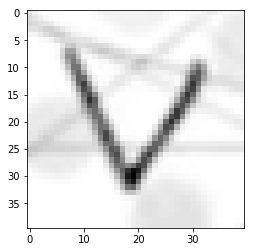

In [63]:
plt.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

In [159]:
img = load_image(train_addrs[0])

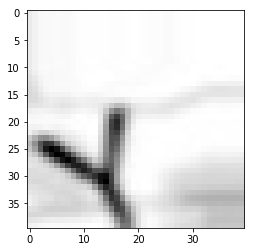

In [175]:
plt.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

In [162]:
res = test_model.predict(img.reshape(-1,40,40,1))

In [163]:
res

array([[0.02741268, 0.02776559, 0.02894875, 0.02876039, 0.02891649,
        0.02982137, 0.02776642, 0.02712759, 0.02892109, 0.02899154,
        0.02928422, 0.02854966, 0.02895372, 0.02849161, 0.02915966,
        0.02756532, 0.0300161 , 0.02880745, 0.02911929, 0.02851778,
        0.0283795 , 0.02822355, 0.02816197, 0.02945782, 0.03048441,
        0.02895823, 0.02859381, 0.02796   , 0.02752955, 0.02914381,
        0.02765793, 0.02894188, 0.02809941, 0.02867618, 0.02683518]],
      dtype=float32)

In [165]:
np.argmax(res)

24

In [172]:
le.inverse_transform([np.argmax(res)]) 

array(['O'], dtype='<U1')

In [66]:
encoded = base64.b64encode(img)

In [67]:
base64.b64decode(encoded)


b'\x00\x00cC\x00\x00rC\x00\x00{C\x00\x00~C\x00\x00\x7fC\x00\x00\x7fC\x00\x00}C\x00\x00\x7fC\x00\x00\x7fC\x00\x00\x7fC\x00\x00\x7fC\x00\x00\x7fC\x00\x00{C\x00\x00uC\x00\x00qC\x00\x00qC\x00\x00qC\x00\x00sC\x00\x00sC\x00\x00sC\x00\x00sC\x00\x00sC\x00\x00qC\x00\x00qC\x00\x00pC\x00\x00uC\x00\x00}C\x00\x00~C\x00\x00|C\x00\x00zC\x00\x00xC\x00\x00xC\x00\x00qC\x00\x00kC\x00\x00nC\x00\x00tC\x00\x00wC\x00\x00uC\x00\x00tC\x00\x00qC\x00\x00\\C\x00\x00eC\x00\x00nC\x00\x00wC\x00\x00{C\x00\x00}C\x00\x00\x7fC\x00\x00\x7fC\x00\x00~C\x00\x00~C\x00\x00\x7fC\x00\x00\x7fC\x00\x00}C\x00\x00zC\x00\x00wC\x00\x00tC\x00\x00rC\x00\x00rC\x00\x00sC\x00\x00sC\x00\x00tC\x00\x00tC\x00\x00rC\x00\x00rC\x00\x00tC\x00\x00xC\x00\x00}C\x00\x00\x7fC\x00\x00~C\x00\x00yC\x00\x00rC\x00\x00nC\x00\x00oC\x00\x00uC\x00\x00zC\x00\x00zC\x00\x00tC\x00\x00oC\x00\x00mC\x00\x00mC\x00\x00WC\x00\x00[C\x00\x00aC\x00\x00eC\x00\x00kC\x00\x00uC\x00\x00{C\x00\x00|C\x00\x00}C\x00\x00}C\x00\x00\x7fC\x00\x00\x7fC\x00\x00\x7fC\x00\x00\x7fC\x00\x00{

In [19]:
import base64

In [26]:
def base64_encode_image(a):
	# base64 encode the input NumPy array
	return base64.b64encode(a).decode("utf-8")
 
def base64_decode_image(a, dtype, shape):
	# if this is Python 3, we need the extra step of encoding the
	# serialized NumPy string as a byte object

	a = bytes(a, encoding="utf-8")
 
	# convert the string to a NumPy array using the supplied data
	# type and target shape
	a = np.frombuffer(base64.decodestring(a), dtype=dtype)
	a = a.reshape(shape)
 
	# return the decoded image
	return a

In [ ]:
s = base64.b64encode(t)
r = base64.decodebytes(s)
q = np.frombuffer(r, dtype=np.float64)

In [326]:
file_name=onlyfiles[0]

image = cv2.imread(os.path.join(dir_parts,file_name))


In [328]:
h, w = image.shape[0], image.shape[1]

image = cv2.resize(image, (np.round(40*w/h).astype(int),40))

h, w = image.shape[0], image.shape[1]

left = np.round((40 - w)/2).astype(int)

right = 40 - left - w

constant= cv2.copyMakeBorder(image,0,0,left,right,cv2.BORDER_REPLICATE)



In [ ]:
top np.floor(40)
bottom
left
right

In [233]:
image=image[:,:,0].copy(order="C")

In [234]:
array = np.array([image, image, image])

In [235]:
ln = array.shape[0]

In [236]:
ln

3

In [247]:
res = base64.b64encode(array).decode("utf-8")

In [248]:
b=base64.b64decode(res)

In [249]:
a = np.frombuffer(b, dtype=np.uint8).reshape(-1,w,h,1)


In [250]:
a.shape

(3, 40, 40, 1)

In [251]:
a

array([[[[253],
         [253],
         [252],
         ...,
         [254],
         [253],
         [253]],

        [[252],
         [252],
         [252],
         ...,
         [252],
         [252],
         [252]],

        [[249],
         [248],
         [246],
         ...,
         [253],
         [253],
         [253]],

        ...,

        [[242],
         [239],
         [234],
         ...,
         [206],
         [201],
         [197]],

        [[251],
         [248],
         [245],
         ...,
         [216],
         [213],
         [211]],

        [[252],
         [252],
         [253],
         ...,
         [224],
         [223],
         [222]]],


       [[[253],
         [253],
         [252],
         ...,
         [254],
         [253],
         [253]],

        [[252],
         [252],
         [252],
         ...,
         [252],
         [252],
         [252]],

        [[249],
         [248],
         [246],
         ...,
         [253],
         [

In [140]:
image = cv2.resize(a[0], (10, 20))

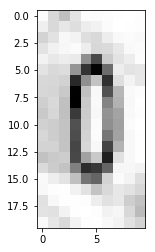

In [141]:
plt.imshow(image, interpolation='nearest', cmap=plt.cm.gray)

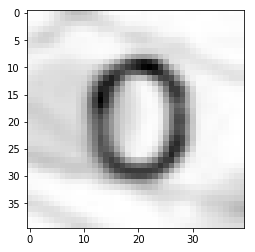

In [121]:
plt.imshow(a, interpolation='nearest', cmap=plt.cm.gray)

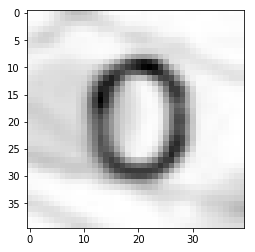

In [135]:
plt.imshow(a[2], interpolation='nearest', cmap=plt.cm.gray)

In [113]:
a

array([[253, 253, 246, 229, 207, 194, 199, 210, 233, 249, 253, 254, 254,
        250, 253, 253, 254, 255, 254, 254, 255, 255, 252, 254, 253],
       [251, 252, 244, 226, 214, 214, 216, 215, 220, 230, 243, 250, 249,
        251, 254, 249, 250, 254, 255, 255, 255, 254, 252, 252, 252],
       [246, 239, 228, 222, 228, 239, 241, 236, 228, 227, 234, 240, 241,
        242, 246, 251, 252, 254, 255, 255, 254, 255, 255, 254, 254],
       [233, 217, 210, 223, 241, 249, 251, 252, 242, 244, 235, 222, 219,
        224, 234, 244, 247, 247, 252, 255, 253, 252, 253, 251, 251],
       [223, 213, 216, 234, 247, 248, 247, 251, 250, 251, 241, 230, 220,
        218, 226, 229, 230, 232, 243, 253, 251, 248, 247, 247, 247],
       [231, 235, 240, 245, 247, 248, 250, 251, 253, 251, 253, 250, 239,
        235, 234, 230, 222, 223, 231, 244, 251, 252, 252, 252, 251],
       [244, 247, 247, 242, 239, 243, 247, 249, 251, 249, 238, 203, 181,
        180, 187, 215, 225, 227, 228, 234, 242, 249, 253, 255, 255],
      

In [160]:
a = np.array([[1,2],[1,2]])

In [161]:
a

array([[1, 2],
       [1, 2]])

In [162]:
np.vstack([a,a])

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [282]:
import time

import requests
 
# initialize the Keras REST API endpoint URL along with the input
# image path
KERAS_REST_API_URL = "http://localhost:8081/FEcapcha"
IMAGE_DIR = r"D:\imageRecognition\fecredit\imageRecognitionProject\imageRecognitionProject\30 captcha"

In [338]:
onlyfiles = [f for f in listdir(IMAGE_DIR) if isfile(join(IMAGE_DIR, f))]

In [287]:
for file in onlyfiles:
    payload = {"image": open(os.path.join(IMAGE_DIR,file), 'rb').read()}
    res = requests.post(KERAS_REST_API_URL, files=payload).json()['result']['string']
    print("file name =", file, "NN prediction=", res, res in file )
    time.sleep(1)

file name = 3E9LF.jfif NN prediction= 3E9LF True
file name = 5GAN2.jfif NN prediction= 5GAN2 True
file name = 5HBN2.jfif NN prediction= 5HBN2 True
file name = 5XBNI.jfif NN prediction= 5XBNI True
file name = 6ICAM.jfif NN prediction= 6ICAM True
file name = 7IVP3.jfif NN prediction= 7IVP3 True
file name = 82DQK.jfif NN prediction= 82DQK True
file name = 8KWQ5.jfif NN prediction= 8K7Q5 False
file name = 9KXR5.jfif NN prediction= 9KXR3 False
file name = AM1T8.jfif NN prediction= AM1T8 True
file name = B6IUO.jfif NN prediction= B6IUO True
file name = BOIV9.jfif NN prediction= BOIT9 False
file name = FRMYS.jfif NN prediction= FHHYS False
file name = GT71D.jfif NN prediction= GT71D True
file name = HBO3V.jfif NN prediction= HBO3V True
file name = IVP4W.jfif NN prediction= IVP4W True
file name = LYS7I.jfif NN prediction= LY27I False
file name = MGTQL.jfif NN prediction= MGTQL True
file name = O2U93.jfif NN prediction= C2U93 False
file name = P4W05.jfif NN prediction= P4WO5 False
file name = P

In [344]:
IMAGE_DIR = r"D:\imageRecognition\fecredit\imageRecognitionProject\imageRecognitionProject\30 captcha"
KERAS_REST_API_URL = "http://103.9.159.186:8081/FEcapcha"
payload = {"image": open(os.path.join(IMAGE_DIR,file), 'rb').read()}
res = requests.post(KERAS_REST_API_URL, files=payload)

In [ ]:
res

In [341]:
for file in onlyfiles[]:
    payload = {"image": open(os.path.join(IMAGE_DIR,file), 'rb').read()}
    res = requests.post(KERAS_REST_API_URL, files=payload).json()['result']['string']
    print("file name =", file, "NN prediction=", res, res in file )
    time.sleep(1)

file name = 3E9LF.jfif NN prediction= 3E9LF True
file name = 5GAN2.jfif NN prediction= 5GAN2 True
file name = 5HBN2.jfif NN prediction= 5HBN2 True
file name = 5XBNI.jfif NN prediction= 5XBN7 False
file name = 6ICAM.jfif NN prediction= 67CAM False
file name = 7IVP3.jfif NN prediction= 7TVP3 False
file name = 82DQK.jfif NN prediction= 82DQK True
file name = 8KWQ5.jfif NN prediction= 8K7Q5 False
file name = 9KXR5.jfif NN prediction= GKXR3 False
file name = AM1T8.jfif NN prediction= AM1T8 True
file name = B6IUO.jfif NN prediction= B67UO False
file name = BOIV9.jfif NN prediction= BO7T9 False
file name = FRMYS.jfif NN prediction= FTHYS False
file name = GT71D.jfif NN prediction= GT71D True
file name = HBO3V.jfif NN prediction= HBO3V True
file name = IVP4W.jfif NN prediction= TVP4N False
file name = LYS7I.jfif NN prediction= LY27T False
file name = MGTQL.jfif NN prediction= MG7QL False
file name = O2U93.jfif NN prediction= C2U93 False
file name = P4W05.jfif NN prediction= P4WO5 False
file na

In [280]:
payload = {"image": open(os.path.join(IMAGE_DIR,file), 'rb').read()}

In [281]:
requests.post(KERAS_REST_API_URL, files=payload).json()

{'success': True, 'result': {'string': '5GAN2'}}

In [272]:
r

{'success': False, 'result': 'None'}

In [217]:
image = open(os.path.join(IMAGE_DIR,file), "rb").read()

In [218]:
image

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x004\x00\xee\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\x

In [219]:
img_array = np.asarray(bytearray(image), dtype=np.uint8)

res = cv2.imdecode(img_array,3)

In [220]:
res.shape

(52, 238, 3)

In [210]:
res

array([[[248, 253, 255],
        [ 98, 103, 112],
        [248, 248, 255],
        ...,
        [246, 255, 244],
        [246, 255, 245],
        [246, 255, 247]],

       [[249, 250, 254],
        [ 91,  91,  97],
        [245, 242, 251],
        ...,
        [250, 255, 247],
        [251, 255, 248],
        [250, 255, 249]],

       [[255, 255, 251],
        [107, 101,  96],
        [255, 251, 248],
        ...,
        [255, 255, 251],
        [255, 255, 254],
        [255, 254, 255]],

       ...,

       [[254, 254, 254],
        [101, 101, 101],
        [250, 250, 250],
        ...,
        [246, 255, 252],
        [246, 254, 253],
        [248, 255, 255]],

       [[254, 254, 254],
        [101, 101, 101],
        [250, 250, 250],
        ...,
        [248, 255, 252],
        [248, 255, 255],
        [250, 255, 255]],

       [[254, 254, 254],
        [101, 101, 101],
        [250, 250, 250],
        ...,
        [243, 253, 247],
        [238, 244, 243],
        [246, 252, 251]]

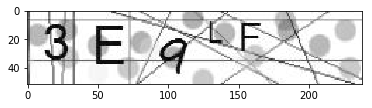

In [202]:
plt.imshow(res, interpolation='nearest', cmap=plt.cm.gray)

In [211]:
res = cv2.imread(os.path.join(IMAGE_DIR,file))

In [212]:
res

array([[[248, 253, 255],
        [ 98, 103, 112],
        [248, 248, 255],
        ...,
        [246, 255, 244],
        [246, 255, 245],
        [246, 255, 247]],

       [[249, 250, 254],
        [ 91,  91,  97],
        [245, 242, 251],
        ...,
        [250, 255, 247],
        [251, 255, 248],
        [250, 255, 249]],

       [[255, 255, 251],
        [107, 101,  96],
        [255, 251, 248],
        ...,
        [255, 255, 251],
        [255, 255, 254],
        [255, 254, 255]],

       ...,

       [[254, 254, 254],
        [101, 101, 101],
        [250, 250, 250],
        ...,
        [246, 255, 252],
        [246, 254, 253],
        [248, 255, 255]],

       [[254, 254, 254],
        [101, 101, 101],
        [250, 250, 250],
        ...,
        [248, 255, 252],
        [248, 255, 255],
        [250, 255, 255]],

       [[254, 254, 254],
        [101, 101, 101],
        [250, 250, 250],
        ...,
        [243, 253, 247],
        [238, 244, 243],
        [246, 252, 251]]

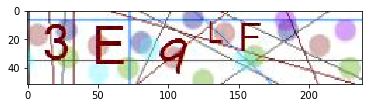

In [206]:
plt.imshow(res)

In [227]:
import json

In [228]:
json.dumps({"a":1})

'{"a": 1}'

In [207]:
res.shape

(52, 238, 3)

In [192]:
import io

In [193]:
io.BytesIO(image)

In [194]:
cv2.imread(io.BytesIO(image))

TypeError: bad argument type for built-in operation

In [ ]:
def create_opencv_image_from_url(url, cv2_img_flag=0):
    request = urlopen(url)
    img_array = np.asarray(bytearray(request.read()), dtype=np.uint8)
    return cv2.imdecode(img_array, cv2_img_flag)

In [ ]:
io.BytesIO(image)

In [187]:
# submit the request


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [177]:
r

{'success': False, 'result': 'None'}

In [ ]:
files = {'media': open('test.jpg', 'rb')}
requests.post(url, files=files)

In [224]:
np.uint8(np.array([1,1,1]))

array([1, 1, 1], dtype=uint8)

In [170]:
payload

{'image': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x004\x00\xee\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3

In [256]:
import datetime as dt

In [258]:
import time

In [262]:
dt.datetime.now()

datetime.datetime(2019, 7, 11, 18, 40, 57, 606966)

In [263]:
dt.datetime.now()

datetime.datetime(2019, 7, 11, 18, 41, 4, 511546)

In [264]:
tmpStamp = dt.datetime.now()

In [266]:
df = dt.datetime.now()-tmpStamp

In [267]:
df

datetime.timedelta(0, 102, 647924)

In [347]:
0.93**5

0.6956883693000002

In [348]:
0.94**5

0.7339040223999997

In [349]:
0.95**5

0.7737809374999998

In [350]:
0.96**5

0.8153726975999999

In [351]:
0.98**5

0.9039207967999999

In [270]:
tmpStamp = dt.datetime.now() ###############################
daya={'chren': 0}
while True:
    
    print((dt.datetime.now()-tmpStamp).microseconds)

    output = None

    if output is not None:

        print('got something from queue')
        data["success"] = True
        
        break

    if (dt.datetime.now()-tmpStamp).total_seconds()>3: ###############################

        print('TIMEOUT')
        break ###############################

    time.sleep(0.5)

0
500430
1408
501639
1917
502862
3752
TIMEOUT
